## What algorithms used in regression  ?

## Read the data in the link below 
- https://drive.google.com/file/d/1AfgM-9xJ2e2iLNs2XmGuhHV_a4P4nLSV/view?usp=sharing

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlb
from  sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


### Do your EDA and Data Cleaning 

In [93]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [94]:
df.shape

(5000, 7)

In [95]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

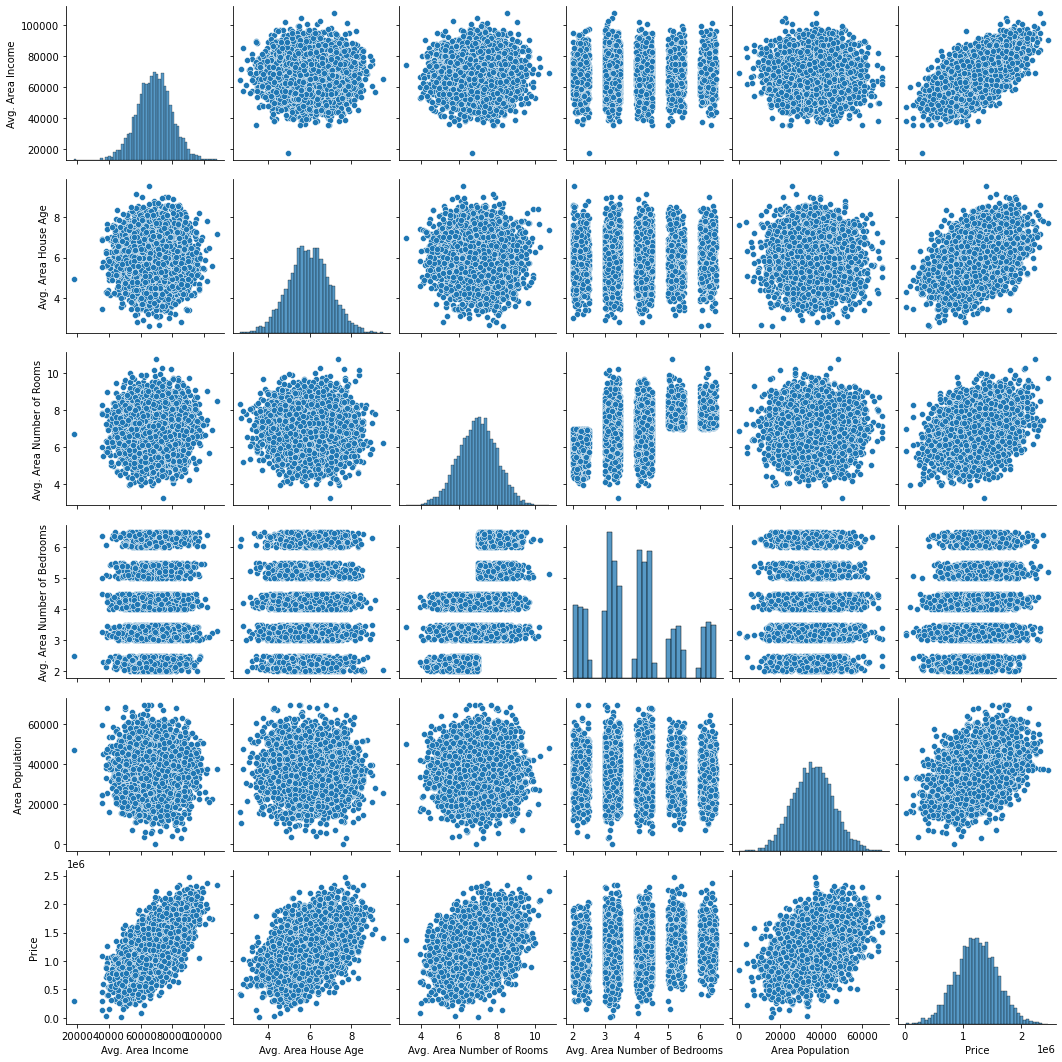

In [96]:
sns.pairplot(df)

C:\Users\Aya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

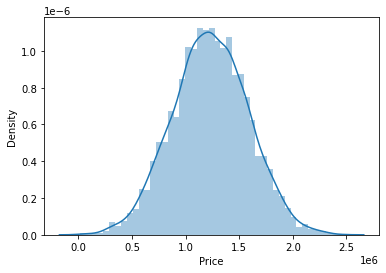

In [97]:
sns.distplot(df['Price'])

<AxesSubplot:>

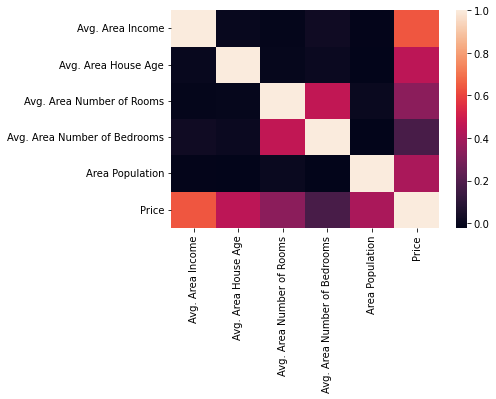

In [98]:
sns.heatmap(df.corr())

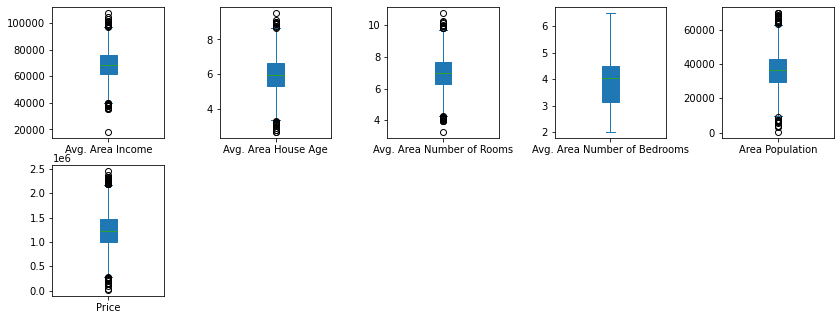

In [99]:
numeric_data=df.select_dtypes(exclude=["category"])
numeric_data.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (14,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

In [100]:
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        #df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,NO Outliers,Handled?
0,Area Population,30,True
1,Price,35,True
2,Avg. Area Number of Bedrooms,0,True
3,Avg. Area House Age,25,True
4,Avg. Area Number of Rooms,24,True
5,Avg. Area Income,32,True


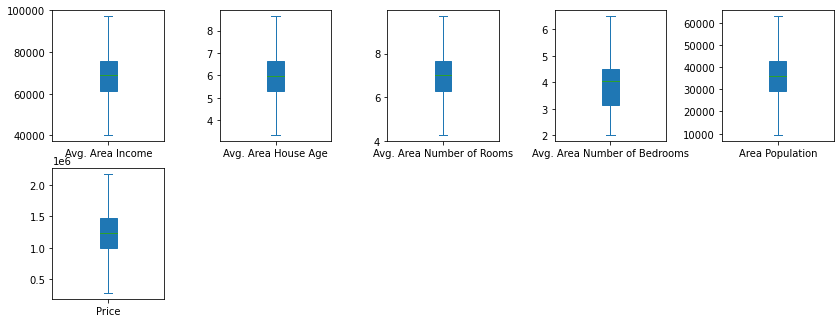

In [101]:
numeric_data=df.select_dtypes(exclude=["category"])
numeric_data.plot(subplots =True, kind = 'box', layout = (5,5), figsize = (14,14),patch_artist=True)
plt.subplots_adjust(wspace = 0.5)

<AxesSubplot:xlabel='Avg. Area House Age', ylabel='Price'>

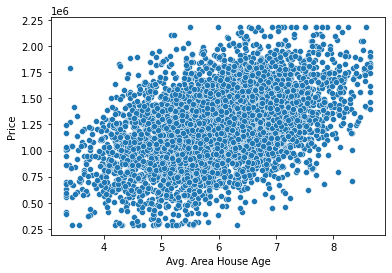

In [102]:
sns.scatterplot(x=df['Avg. Area House Age'], y=df['Price'])

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Area Population'>

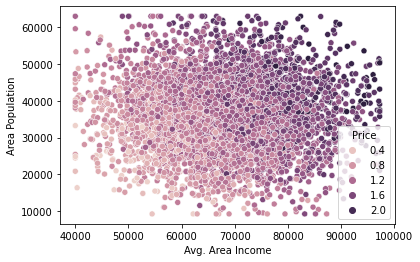

In [103]:
sns.scatterplot(x=df['Avg. Area Income'], y=df['Area Population'], hue=df['Price'])

<AxesSubplot:>

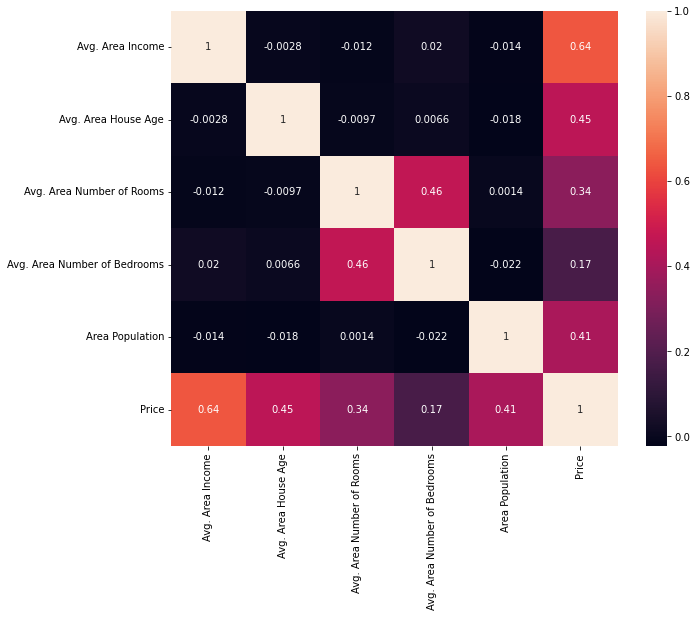

In [104]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

## Training a Linear Regression Model
- Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column.
- please explain every step you take and why 

In [105]:
X = df.drop(columns=['Price', 'Address']) # the input features 
y = df['Price'] # the target or output


### Now let's split the data into a training set and a testing set. 

In [106]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=44, shuffle=True)

### Now let's train our linear regression model

In [107]:
#MODELING
#appling linear regrassion Model
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)

#calculating
print('train score is : ' , LinearRegressionModel.score(X_train, y_train))
print('test score is : ' , LinearRegressionModel.score(X_test, y_test))

train score is :  0.9144841493289636
test score is :  0.9203363026336784


In [108]:
regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = regressor.predict(X_test)

### Use Regression Evaluation Metrics

In [119]:
# MAE
print(mean_absolute_error(y_test,y_pred))

80230.00130627105


In [120]:
# MSE
print(mean_squared_error(y_test,y_pred))

9950373438.308525


In [122]:
# RMSE
print(np.sqrt(mean_squared_error(y_test,y_pred)))

99751.55857583642


In [125]:
np.mean(y_test)

1228029.287881539

In [126]:
np.mean(y_pred)

1227929.301881852

In [128]:
r2_score (y_pred,y_test)

0.9128761106679484

## Train Ridge Regression model

In [140]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 1.0)

In [141]:
ridge.fit (X_train, y_train)

Ridge()

In [144]:
ridge.score(X, y, sample_weight=None)

0.9164458672840706

In [145]:
Y_Pred = ridge.predict (X_test)

## Train Lasso Regression model

In [149]:
from sklearn.linear_model import Lasso

lasso =Lasso()

In [151]:
lasso.fit (X_train, y_train)

Lasso()

In [152]:
lasso.score(X, y, sample_weight=None)

0.9164450454424927

In [ ]:
Y_Pred = lasso.predict (X_test)

## Train Support Vector Machine Model

In [165]:
from sklearn.svm import SVC
model =SVC()

In [166]:
model.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [158]:
model.score(X, y, sample_weight=None)

AttributeError: 'SVC' object has no attribute 'shape_fit_'

## Train Random Forest Regressor Model

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
regressor = RandomForestRegressor(n_estimators =100, random_state= 42)

In [172]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [174]:
regressor.score(X, y, sample_weight=None)

0.9506508722190344